In [77]:
#21BAI1778
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder

#load libraries
import numpy as np
import pandas as pd

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, f1_score, precision_score, recall_score

# for visualisation
import matplotlib.pyplot as plt

In [78]:
#21BAI1778
tt = pd.read_csv('Mall_Customers_set2.csv')
tt

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [79]:
#21BAI1778
tt.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [80]:
#21BAI1778
tt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [81]:
#21BIA1778
tt.dtypes

CustomerID                 int64
Gender                    object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object

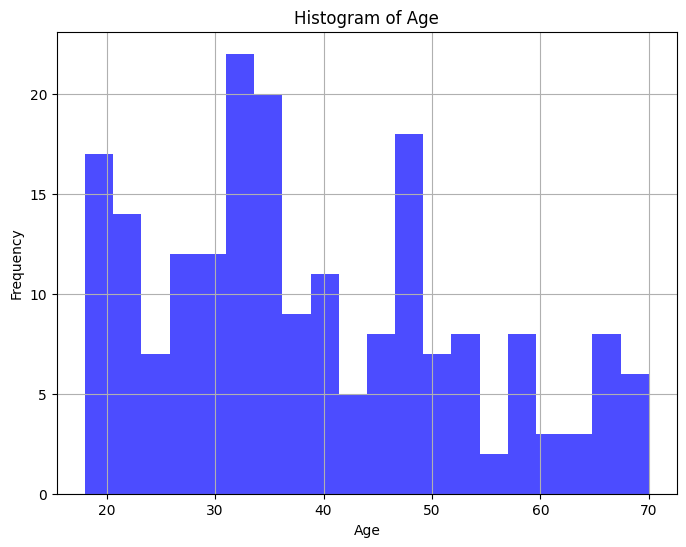

In [82]:
#21BAI1778
plt.figure(figsize=(8, 6))
plt.hist(tt['Age'], bins=20, color='blue', alpha=0.7)
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Histogram of Age')
plt.grid(True)
plt.show()



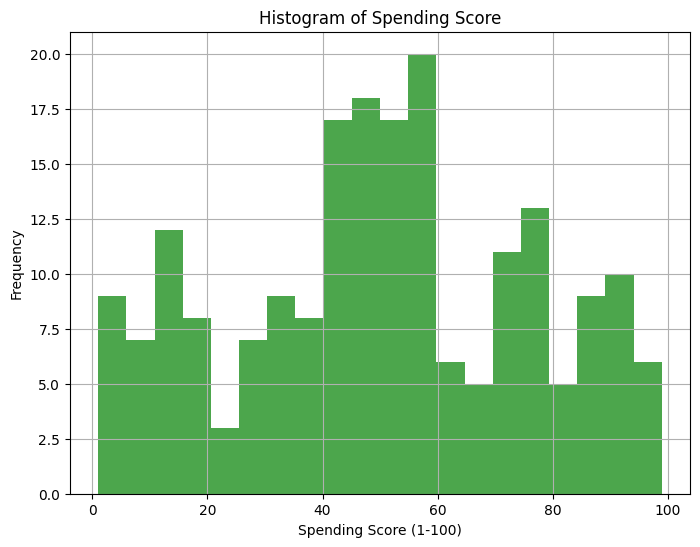

In [83]:
#21BAI1778
# Plot the histogram for Spending Score
plt.figure(figsize=(8, 6))
plt.hist(tt['Spending Score (1-100)'], bins=20, color='green', alpha=0.7)
plt.xlabel('Spending Score (1-100)')
plt.ylabel('Frequency')
plt.title('Histogram of Spending Score')
plt.grid(True)
plt.show()

In [84]:
#21BAI1778
y = tt.iloc[:, [4]].values
y

array([[39],
       [81],
       [ 6],
       [77],
       [40],
       [76],
       [ 6],
       [94],
       [ 3],
       [72],
       [14],
       [99],
       [15],
       [77],
       [13],
       [79],
       [35],
       [66],
       [29],
       [98],
       [35],
       [73],
       [ 5],
       [73],
       [14],
       [82],
       [32],
       [61],
       [31],
       [87],
       [ 4],
       [73],
       [ 4],
       [92],
       [14],
       [81],
       [17],
       [73],
       [26],
       [75],
       [35],
       [92],
       [36],
       [61],
       [28],
       [65],
       [55],
       [47],
       [42],
       [42],
       [52],
       [60],
       [54],
       [60],
       [45],
       [41],
       [50],
       [46],
       [51],
       [46],
       [56],
       [55],
       [52],
       [59],
       [51],
       [59],
       [50],
       [48],
       [59],
       [47],
       [55],
       [42],
       [49],
       [56],
       [47],
       [54],
       [53],

In [85]:
#21BAI1778
unique_values = tt['Gender'].unique()
unique_values

array(['Male', 'Female'], dtype=object)

In [86]:
#21BAI1778
#encode columns
encoded = tt
columns_to_encode = ['Gender']
le = LabelEncoder()
for column in columns_to_encode:
    encoded[column] = le.fit_transform(encoded[column])

In [87]:
#21BAI1778
x = encoded.iloc[:, [0, 1, 2, 3]].values
x

array([[  1,   1,  19,  15],
       [  2,   1,  21,  15],
       [  3,   0,  20,  16],
       [  4,   0,  23,  16],
       [  5,   0,  31,  17],
       [  6,   0,  22,  17],
       [  7,   0,  35,  18],
       [  8,   0,  23,  18],
       [  9,   1,  64,  19],
       [ 10,   0,  30,  19],
       [ 11,   1,  67,  19],
       [ 12,   0,  35,  19],
       [ 13,   0,  58,  20],
       [ 14,   0,  24,  20],
       [ 15,   1,  37,  20],
       [ 16,   1,  22,  20],
       [ 17,   0,  35,  21],
       [ 18,   1,  20,  21],
       [ 19,   1,  52,  23],
       [ 20,   0,  35,  23],
       [ 21,   1,  35,  24],
       [ 22,   1,  25,  24],
       [ 23,   0,  46,  25],
       [ 24,   1,  31,  25],
       [ 25,   0,  54,  28],
       [ 26,   1,  29,  28],
       [ 27,   0,  45,  28],
       [ 28,   1,  35,  28],
       [ 29,   0,  40,  29],
       [ 30,   0,  23,  29],
       [ 31,   1,  60,  30],
       [ 32,   0,  21,  30],
       [ 33,   1,  53,  33],
       [ 34,   1,  18,  33],
       [ 35,  

In [88]:
#21BAI1778
from sklearn.cluster import KMeans
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)

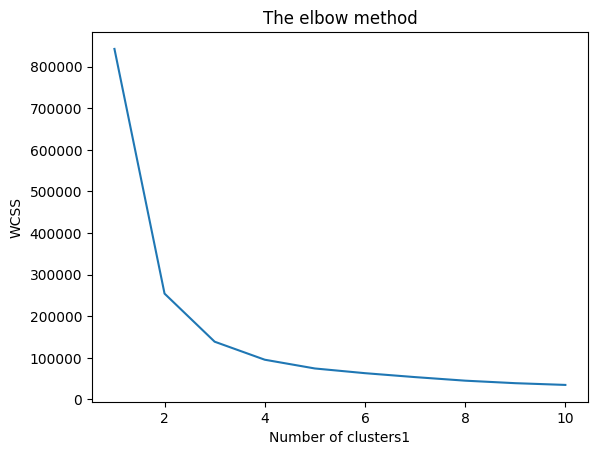

In [89]:
#21BAI1778
plt.plot(range(1, 11), wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters1')
plt.ylabel('WCSS')
plt.show()

In [91]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=5)
kmeans.fit(x)
y_kmeans = kmeans.predict(x)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


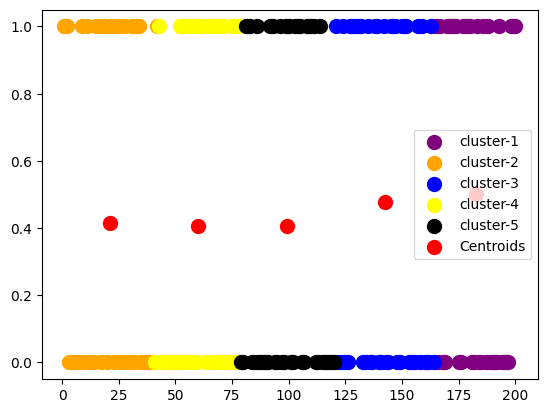

In [62]:
#21BAI1778
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], s = 100, c = 'purple', label = 'cluster-1')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], s = 100, c = 'orange',  label = 'cluster-2')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1], s = 100, c = 'blue',  label = 'cluster-3')
plt.scatter(x[y_kmeans == 3, 0], x[y_kmeans == 3, 1], s = 100, c = 'yellow',  label = 'cluster-4')
plt.scatter(x[y_kmeans == 4, 0], x[y_kmeans == 4, 1], s = 100, c = 'black',  label = 'cluster-5')

#Plotting the centroids
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s = 100, c = 'red', label = 'Centroids')

plt.legend()

NameError: ignored